In [1]:
import numpy as np
import pylab as pl
import ot
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
import sklearn.datasets

In [50]:
mean = [5,2,12]
cov = sklearn.datasets.make_spd_matrix(3)

In [53]:
N = 3
d = 3
n_i = 1400

measures_locations = np.random.multivariate_normal(mean, cov, (3, n_i))
measures_weights = [np.array([1/n_i]*n_i)]*3


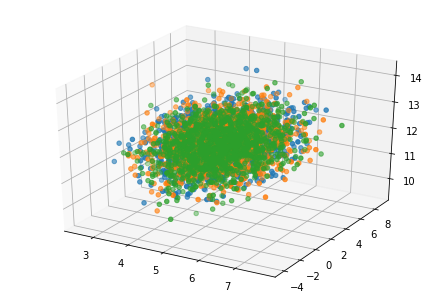

In [54]:
def plot_3d_distrribution(measures_locations, measures_weights):
    fig = pyplot.figure()
    ax = Axes3D(fig)

    for (x_i, b_i) in zip(measures_locations, measures_weights):
        color = np.random.randint(low=1, high=10 * N)
        sequence_containing_x_vals = list(x_i[:,0])
        sequence_containing_y_vals = list(x_i[:,1])
        sequence_containing_z_vals = list(x_i[:,2])
        ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, label='input measure')
    pyplot.show()

    
plot_3d_distrribution(measures_locations, measures_weights)


In [40]:
k = 150  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations

X_joint = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, weights=np.array([1/N]*N))
X_12 = ot.lp.free_support_barycenter(measures_locations[:2], measures_weights[:2], X_init, weights=np.array([1/2,1/2]))


In [42]:
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations

measures_12_3 = [X_12, measures_locations[2]]
weights = [np.ones(len(X_12))/len(X_12), np.ones(len(measures_locations[2]))/len(measures_locations[2])]
smallest = float("inf")
smallestBeta = -1
dots = []
for i in np.arange(0,1,0.001):
    X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i]),
                                                                          numItermax=100)
    M = ot.dist(X_3, X_joint)
    a,b = np.ones((len(X_3),)) / len(X_3), np.ones((len(X_joint),))/len(X_joint)
    G0 = ot.emd(a,b,M)
    dist = np.sum(np.multiply(M,G0))
    if (dist < smallest):
        smallest = dist
        smallestBeta = i
    dots.append( dist )
print(smallest)
print(smallestBeta)

0.10511122133910099
0.47500000000000003


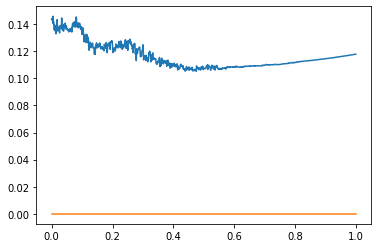

In [43]:
pl.figure(1)
pl.plot(np.arange(0,1,0.001), dots)
pl.plot([0,1],[0,0])

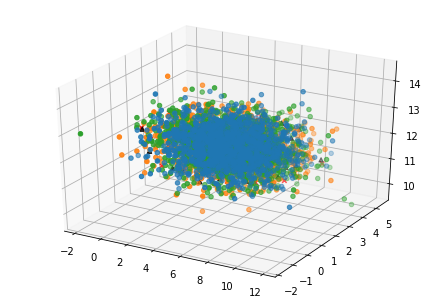

In [44]:
i=smallestBeta
X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i]),
                                   numItermax=10000)
fig = pyplot.figure()
ax = Axes3D(fig)

for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    sequence_containing_x_vals = list(x_i[:,0])
    sequence_containing_y_vals = list(x_i[:,1])
    sequence_containing_z_vals = list(x_i[:,2])
    ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, label='input measure')    
    
ax.scatter(X_joint[:,0], X_joint[:,1], X_joint[:,2], c='black', marker='^', label='input measure')    
ax.scatter(X_3[:,0], X_3[:,1], X_3[:,2], c='red', marker='x', label='input measure')    

pyplot.show()


In [45]:
from sklearn.decomposition import PCA

def plot_in_low_dim(zh):
    pca_zh = PCA(n_components=2)
    principle_zh = pca_zh.fit_transform(zh)
    pl.figure()
    x,y = np.transpose(principle_zh)
    pl.scatter(x,y,c='r',marker='^')
    pl.show()

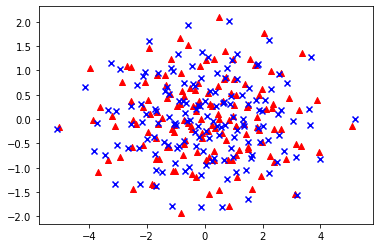

In [46]:
pca_zh = PCA(n_components=2)
a = pca_zh.fit_transform(X_joint)
b = pca_zh.fit_transform(X_3)
pl.figure()
x,y = np.transpose(a)
x2,y2 = np.transpose(b)
pl.scatter(x,y,c='r',marker='^')
pl.scatter(x2,y2,c='b',marker='x')
pl.show()

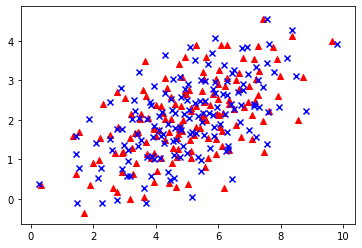

In [47]:

pl.figure()
x,y = X_joint[:,0],X_joint[:,1]
x2,y2 = X_3[:,0],X_3[:,1]
pl.scatter(x,y,c='r',marker='^')
pl.scatter(x2,y2,c='b',marker='x')
pl.show()

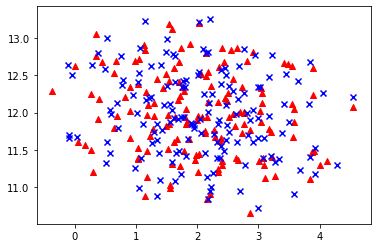

In [48]:

pl.figure()
x,y = X_joint[:,1],X_joint[:,2]
x2,y2 = X_3[:,1],X_3[:,2]
pl.scatter(x,y,c='r',marker='^')
pl.scatter(x2,y2,c='b',marker='x')
pl.show()

In [49]:
M = ot.dist(X_3, X_joint)
a,b = np.ones((len(X_3),)) / len(X_3), np.ones((len(X_joint),))/len(X_joint)
G0 = ot.emd(a,b,M)

In [1]:
# Author: Vivien Seguy <vivien.seguy@iip.ist.i.kyoto-u.ac.jp>
#
# License: MIT License

import numpy as np
import matplotlib.pylab as pl
import ot

In [2]:
N = 3
d = 2
measures_locations = []
measures_weights = []

for i in range(N):

    n_i = np.random.randint(low=1, high=20)  # nb samples

    mu_i = np.random.normal(0., 4., (d,))  # Gaussian mean

    A_i = np.random.rand(d, d)
    cov_i = np.dot(A_i, A_i.transpose())  # Gaussian covariance matrix

    x_i = ot.datasets.make_2D_samples_gauss(n_i, mu_i, cov_i)  # Dirac locations
    b_i = np.random.uniform(0., 1., (n_i,))
    b_i = b_i / np.sum(b_i)  # Dirac weights

    measures_locations.append(x_i)
    measures_weights.append(b_i)

In [14]:
len(X_init)

10

In [3]:
k = 10  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
b = np.ones((k,)) / k  # weights of the barycenter (it will not be optimized, only the locations are optimized)

X = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

In [18]:
b

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

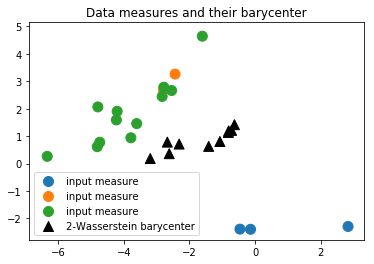

In [8]:
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], s=b * 1000, label='input measure')
pl.scatter(X[:, 0], X[:, 1], s=b * 1000, c='black', marker='^', label='2-Wasserstein barycenter')
pl.title('Data measures and their barycenter')
pl.legend(loc=0)
pl.show()